In [2]:
# Remove irrelevant columns
import pandas as pd

# Load the dataset
file_path = 'ready_for_filtering.xlsx'
df = pd.read_excel(file_path)

# Display initial columns to verify
df.head()

columns_to_drop = ['Carimbo de data/hora', 'id_integer', 'agile_methods',  'metrics_category',	'sanitized_metrics',	'agile_methods_filtered',	'matched_metrics', 'not_matched_metrics']
df = df.drop(columns=columns_to_drop)

# Convert 'Sim'/'Não' to 1/0
binary_columns = [
    'use_metrics_planning', 'use_metrics_review', 'use_metrics_weekly',
    'use_metrics_daily', 'use_metrics_retro',
    'metrics_category_cronograma_e_progresso', 'metrics_category_produto',
    'metrics_category_processo', 'metrics_category_tecnologia',
    'metrics_category_pessoas', 'metrics_category_cliente',
    'agile_methods_scrum', 'agile_methods_kanban', 'agile_methods_scrumban',
    'agile_methods_xp', 'agile_methods_safe', 'agile_methods_lean',
   
]

df[binary_columns] = df[binary_columns].replace({'Sim': 1, 'Não': 0})



# Verificar as colunas categóricas
categorical_columns = ['role', 'years_exp', 'org_size']

# Certificar-se de que as colunas categóricas são strings e limpar valores inconsistentes
for col in categorical_columns:
    df[col] = df[col].astype(str)  # Garantir que são strings
    df[col] = df[col].replace({'False': 'Unknown', 'True': 'Unknown'})  # Substituir "False" e "True" por "Unknown"

# Aplicar one-hot encoding às colunas categóricas
df_encoded = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns)

# Substituir valores "False" e "True" por 0 e 1 nas colunas já binárias
binary_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[binary_columns] = df_encoded[binary_columns].astype(int)

# drop years_exp_23

prepared_file_path = 'prepared_dataset_cleaned.xlsx'
df.to_excel(prepared_file_path, index=False)

# # Display prepared dataset summary
# df.head()

df_encoded.head()


/var/folders/5j/0g6pzkwj7_g1p9xwqx5jfgq80000gn/T/ipykernel_25403/609220563.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'Sim': 1, 'Não': 0})


,use_metrics_planning,use_metrics_review,use_metrics_weekly,use_metrics_daily,use_metrics_retro,agile_methods_scrum,agile_methods_kanban,agile_methods_scrumban,agile_methods_xp,agile_methods_safe,...,years_exp_10 a 20,years_exp_23 anos,years_exp_6 a 9,years_exp_Mais de 20,years_exp_nan,org_size_Grande empresa,org_size_Microempresa,org_size_Média empresa,org_size_Pequena empresa,org_size_nan
0,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0



Treinando modelo para a categoria: metrics_category_cronograma_e_progresso
Resultados para a categoria metrics_category_cronograma_e_progresso:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        27
           1       0.95      1.00      0.97        76

    accuracy                           0.96       103
   macro avg       0.97      0.93      0.95       103
weighted avg       0.96      0.96      0.96       103


Treinando modelo para a categoria: metrics_category_produto
Resultados para a categoria metrics_category_produto:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        24
           1       0.94      0.97      0.96        79

    accuracy                           0.93       103
   macro avg       0.92      0.88      0.90       103
weighted avg       0.93      0.93      0.93       103


Treinando modelo para a categoria: metrics_category_processo
Resultados para a catego

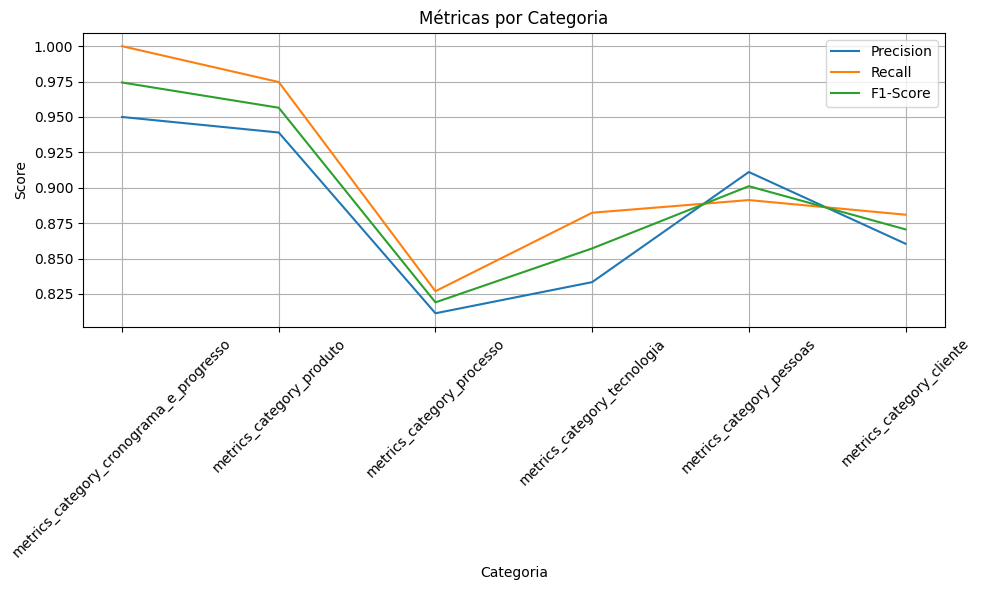

Resultados e gráficos salvos em 'final_metrics_analysis.xlsx'.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import joblib

# Carregar o dataset
df = pd.read_excel('prepared_dataset_cleaned.xlsx')

# Identificar as colunas categóricas que precisam de codificação
categorical_columns = ['role', 'years_exp', 'org_size']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Separar categorias de métricas e features
categories = ['metrics_category_cronograma_e_progresso', 'metrics_category_produto',
              'metrics_category_processo', 'metrics_category_tecnologia',
              'metrics_category_pessoas', 'metrics_category_cliente']

X = df.drop(columns=categories)
classification_reports = {}

columns = df.columns.tolist()
joblib.dump(columns, 'model_columns.joblib')

# Loop por cada categoria para treinar o modelo
for category in categories:
    print(f"\nTreinando modelo para a categoria: {category}")
    
    # Separar os dados em treino, validação e teste
    y = df[category]
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)  # 0.25 * 0.8 = 0.2

    # Definir e treinar o modelo
    model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, class_weight='balanced')
    model.fit(X_train, y_train)
    
    # Fazer previsões no conjunto de validação para ajuste fino
    probabilities_val = model.predict_proba(X_val)[:, 1]
    y_pred_val = model.predict(X_val)
    # Calibrar o modelo ou ajustar os parâmetros se necessário com base no desempenho na validação
    
    # Fazer previsões no conjunto de teste
    probabilities = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    # Calcular métricas no conjunto de teste
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[category] = report
    
    print(f"Resultados para a categoria {category}:")
    print(classification_report(y_test, y_pred))

    # Salvar o modelo
    model_filename = f'model_{category}.joblib'
    joblib.dump(model, model_filename)

# Salvar os relatórios
joblib.dump(classification_reports, 'final_results_random_forest.joblib')

# Gerar e salvar gráficos de desempenho
results_df = pd.DataFrame({
    'Categoria': categories,
    'Precision': [classification_reports[cat]['1']['precision'] for cat in categories],
    'Recall': [classification_reports[cat]['1']['recall'] for cat in categories],
    'F1-Score': [classification_reports[cat]['1']['f1-score'] for cat in categories],
})

# Gráficos de precisão, recall, F1-Score e ROC-AUC
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for metric in ['Precision', 'Recall', 'F1-Score']:
    plt.plot(results_df['Categoria'], results_df[metric], label=metric)
plt.title('Métricas por Categoria')
plt.ylabel('Score')
plt.xlabel('Categoria')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


results_df.to_excel('final_metrics_analysis.xlsx', index=False)
print("Resultados e gráficos salvos em 'final_metrics_analysis.xlsx'.")
